In [19]:
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleStaeckel
from galpy.actionAngle import actionAngleAdiabatic
from galpy.df import quasiisothermaldf
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
aAS= actionAngleStaeckel(pot=MWPotential2014,delta=0.45,c=True)
qdfS= quasiisothermaldf(1./3.,0.2,0.1,1.,1.,pot=MWPotential2014,aA=aAS,cutcounter=True)

Populating the interactive namespace from numpy and matplotlib
C:\Users\micha\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['legend']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"



C:\Users\micha\Anaconda3\lib\site-packages\galpy\df_src\quasiisothermaldf.py:266: RuntimeWarning: divide by zero encountered in log
  -kappa*jr*numpy.exp(-2.*lnsr)



Text(0.5,1,'vz')

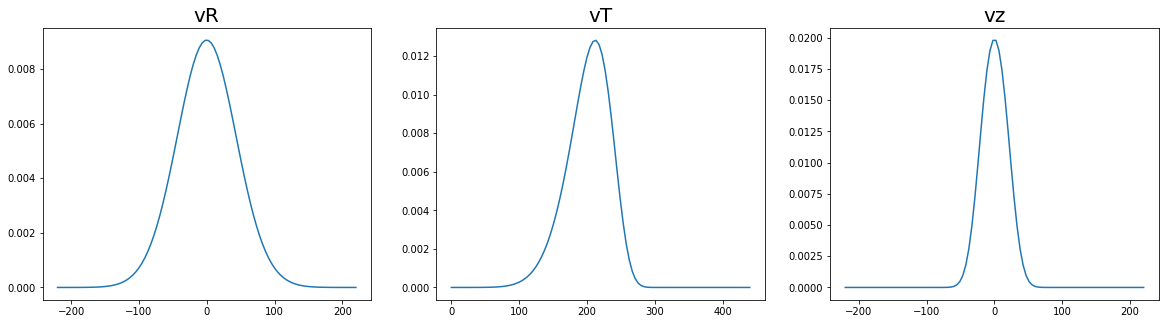

In [39]:
#initialize mean values for (R,vR,vT,z,vz)
mR,mz = 8.3/8.,0./8. #convert to nat. units

vRs= np.linspace(-1,1,100) #odd endpoints because galpy uses natural units
vTs= np.linspace(0,2,100)
vzs= np.linspace(-1,1,100)

#Calculating the probability of vR without regard for vT or vz 
#is called marginalizing over the remaining probabilities.
#This is the opposite of conditional probability. 

pvR= np.array([qdfS.pvR(vR,mR,mz) for vR in vRs]) #uses Gauss-Legendre integration
pvT= np.array([qdfS.pvT(vT,mR,mz) for vT in vTs])
pvz= np.array([qdfS.pvz(vz,mR,mz) for vz in vzs])

#plot!
fig, ax = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(20,5))

ax[0].plot(vRs*220, pvR/numpy.sum(pvR)/(vRs[1]-vRs[0])/220) #convert to physical units and normalize area to 1 
ax[0].set_title('vR', fontsize=20)
ax[1].plot(vTs*220, pvT/numpy.sum(pvT)/(vTs[1]-vTs[0])/220)
ax[1].set_title('vT', fontsize=20)
ax[2].plot(vRs*220, pvz/numpy.sum(pvR)/(vzs[1]-vzs[0])/220)
ax[2].set_title('vz', fontsize=20)

C:\Users\micha\Anaconda3\lib\site-packages\galpy\df_src\quasiisothermaldf.py:266: RuntimeWarning: divide by zero encountered in log
  -kappa*jr*numpy.exp(-2.*lnsr)



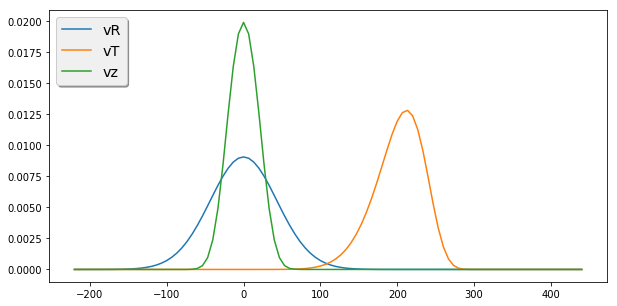

In [42]:
#above graphs overlayed
vs= np.linspace(-1,2,100)

pvR= np.array([qdfS.pvR(v,mR,mz) for v in vs])
pvT= np.array([qdfS.pvT(v,mR,mz) for v in vs])
pvz= np.array([qdfS.pvz(v,mR,mz) for v in vs])

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(vs*220, pvR/numpy.sum(pvR)/(vs[1]-vs[0])/220, label='vR') #convert to physical units and normalize area to 1 
ax.plot(vs*220, pvT/numpy.sum(pvT)/(vs[1]-vs[0])/220, label='vT')
ax.plot(vs*220, pvz/numpy.sum(pvz)/(vs[1]-vs[0])/220, label='vz')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#F0F0F0')


C:\Users\micha\Anaconda3\lib\site-packages\galpy\df_src\quasiisothermaldf.py:266: RuntimeWarning: divide by zero encountered in log
  -kappa*jr*numpy.exp(-2.*lnsr)



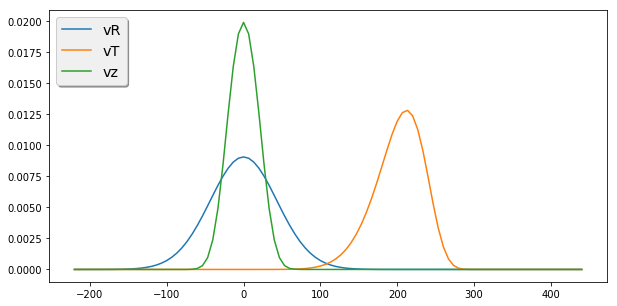

In [43]:
#try using Adiabatic Approximation? (Spoiler, it's the same!)

aA= actionAngleAdiabatic(pot=MWPotential2014,c=True)
qdf= quasiisothermaldf(1./3.,0.2,0.1,1.,1.,pot=MWPotential2014,aA=aA,cutcounter=True)

vs= np.linspace(-1,2,100)

pvR= np.array([qdfS.pvR(v,mR,mz) for v in vs])
pvT= np.array([qdfS.pvT(v,mR,mz) for v in vs])
pvz= np.array([qdfS.pvz(v,mR,mz) for v in vs])

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(vs*220, pvR/numpy.sum(pvR)/(vs[1]-vs[0])/220, label='vR') #convert to physical units and normalize area to 1 
ax.plot(vs*220, pvT/numpy.sum(pvT)/(vs[1]-vs[0])/220, label='vT')
ax.plot(vs*220, pvz/numpy.sum(pvz)/(vs[1]-vs[0])/220, label='vz')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#F0F0F0')
